### Бинарный поиск

Бинарный поиск (также известен как метод деления пополам и дихотомия) — классический алгоритм поиска элемента в отсортированном массиве.
Если у нас есть массив, содержащий упорядоченную последовательность данных, то очень эффективен двоичный поиск.
Бинарный поиск позволяет найти данный элемент в отсортированном массиве или определить, что он не встречается в данном массиве
за O(log n) действий, где n - количество элементов в массиве.
### Алгоритм 
1) Находится средний элемент последовательности. Для этого первый и последний элементы связываются с переменными, а средний вычисляется.

2) Средний элемент сравнивается с искомым значение. В зависимости от того, больше оно или меньше среднего элемента, дальнейший поиск будет происходить лишь в левой или правой половинах массива. Если значение среднего элемента окажется равным искомому, то поиск завершен.

3) Одна из границ исследуемой последовательности становится равной предыдущему или последующему среднему элементу из п.2.

4) Снова находится средний элемент, теперь уже в «выбранной» половине. Описанный выше алгоритм повторяется уже для данной последовательности.
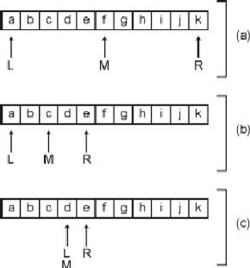

In [67]:
def binfind(array,x,left,right):
    """
    array - sorted list
    x - searching value
    left - index of left boundary
    right - index of right boudary
    
    """
    
    if left > right or len(array) == 0:
        return None
    middle = (left+right) // 2 # find average value of a list 
    if array[middle] == x:
        return middle          # if find from the first attempt, return searching value  
    elif (array[middle]<x):    # if searching value is bigger then we need to change left boundary
        return binfind(array,x,middle+1,right) # recursively return searching value
    else: # similarly, only need to change right boundary
        return binfind(array,x,left,middle-1)
    
values = [i for i in range(101)]

print(binfind(values,23,0,len(values)))
%timeit binfind(values,23,0,len(values))

23
1.75 µs ± 21.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Линейный поиск

Простейший алгоритм поиска элемента в списке, также известен, как метод перебора или "грубой силы". 
Работает за время O(n), где n - длина списка на входе (понятно и по названию алгоритма)

Самый простой алгоритм (и самый неправильный), который приходит в голову - это создать переменную result, которой заранее присвоим значение None, а далее в цикле for пройтись по всем индексам и сравнить элементы с искомым значением (lst[index] = x), и если данное условие выполняется, то result = index. Как многие догадались, поиск в массиве будет продолжаться, даже после нахождения искомого индекса (не самое элегентное решение, тем более, если элементов в списке будет очень много)

In [66]:
lst = [x for x in range(26)]

def linear_search(array,x):
    """
    Find an element in a list
    array - a list
    x - searching variable
    
    """
    i,length = 0, len(array)
    while i<length and x!= array[i]:
        i+=1
    return i if i<len(array) else None

print(linear_search(lst,14))
%timeit linear_search(lst,14)

14
1.19 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Но смущает то, что процедура выполняет по 2 проверки на каждой итерации - не вышли ли мы за границы списка и проверка равенства. Проще говоря, условие i < len(lst) из while надо бы убрать. Поместим элемент x в конец списка и будем точно уверены, что найдем искомый индекс. Если мы найдем “заменитель” (его еще называют ограничителем или барьером), то x в списке нет.
### Оптимизированный вариант

In [65]:
def linear_search(array,x):
    lst.append(x)
    i = 0
    while x!= array[i]:
        i+=1
    return i if i<( len(array)-1) else None

print(linear_search(lst,3))
%timeit linear_search(lst,3)

3
421 ns ± 9.52 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Алгоритмы сортировки
#### Heap Sort

Используем реализацию структуры данных "куча" из библиотеки heapq.
Для сортировки нам понадобятся методы heappush и heappop - для вставки элемента в структуру и удаления элемента структры с сохраненим инварианта этой структуры данных - значения дочерних элементво меньше значения родительского элемента.
Реализация алгоритма очень проста: из кучи последовательно извлекается максимальный (корневой) элемент и записывается в конец списка, пока куча не опустеет. Сложность алгоритма - O(n*log(n)), где n - длина списка на входе.

In [64]:
import heapq
def heapsort(array):
    h = []
    for value in array:
        heapq.heappush(h, value)
    return [heapq.heappop(h) for i in range(len(h))]

print(heapsort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0]))
%timeit heapsort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2.8 µs ± 34.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### QuickSort
Один из самых известных алгоритмов сортировки, также известный как qsort. 
Без рандомизации может выглядеть очень лаконично

In [68]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        return quick_sort([x for x in arr[1:] if x < arr[0]]) + \
               [arr[0]] + \
               quick_sort([x for x in arr[1:] if x >= arr[0]])

print(quick_sort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0]))
%timeit quick_sort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
6.79 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### For more info look up here: 
https://github.com/Yorko/python_intro/blob/master/python_lesson3_data_structures1/lesson3_part2_search_sort.ipynb